This notebook presents a simulation of a pool of Renshaw cells (RC) with a current injected (iInjected) in their soma.

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from InterneuronPool import InterneuronPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory
from jointAnkleForceTask import jointAnkleForceTask

/home/renato/intel/intelpython27/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
conf = Configuration('confInjectedCurrentRenshawCellPool.rmto')
conf.simDuration_ms = 100 # Here I change simulation duration without changing the Configuration file.

In [10]:
pools = []
pools.append(InterneuronPool(conf, 'RC'))

Interneuron Pool of RC built


In [4]:
# Time vector for the simulation
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [11]:
# The simulation  itself
tic = time.clock()
for i in xrange(0,len(t)-1):
    # Here you can change the injected current in the Resnhaw cell during the simulation
    for j in pools[0].unit:
        j.iInjected = 20
    pools[0].atualizeInterneuronPool(t[i])
toc = time.clock()
print str(toc - tic) + ' seconds'

61.965788 seconds


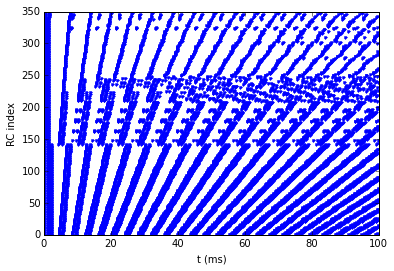

In [6]:
pools[0].listSpikes()

plt.plot(pools[0].poolSomaSpikes[:, 0],
    pools[0].poolSomaSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

In [7]:
a = 'inf'
b = float(a)
np.isfinite(b)

False